# RJNA720687 - Layton et al.

Article link: [https://ehp.niehs.nih.gov/doi/10.1289/EHP10289](https://ehp.niehs.nih.gov/doi/10.1289/EHP10289).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [2]:
coco <- read.csv(here("data/processed/PRJNA720687_processed.csv.gz"))
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,lat_lon
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,10059,+10060.T,ins:10060:1,0,45,0,SRR14276220,2020-09-17,NP-Inf-09-17-20-A,302,3577480826,PRJNA720687,Inf,not collected
2,10193,+10194.A,ins:10194:1,0,40,0,SRR14276220,2020-09-17,NP-Inf-09-17-20-A,302,3577480826,PRJNA720687,Inf,not collected
3,10427,+10428.T,ins:10428:1,0,16,0,SRR14276220,2020-09-17,NP-Inf-09-17-20-A,302,3577480826,PRJNA720687,Inf,not collected
4,10527,+10528.T,ins:10528:1,0,22,0,SRR14276220,2020-09-17,NP-Inf-09-17-20-A,302,3577480826,PRJNA720687,Inf,not collected
5,10605,+10606.T,ins:10606:1,0,45,0,SRR14276220,2020-09-17,NP-Inf-09-17-20-A,302,3577480826,PRJNA720687,Inf,not collected
6,10708,+10709.T,ins:10709:1,0,55,0,SRR14276220,2020-09-17,NP-Inf-09-17-20-A,302,3577480826,PRJNA720687,Inf,not collected


In [3]:
lineages_in_paper <- c("B.1.399", "B.1", "B.1.1.158", "B.1.369", "B.1.2")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]  5 23

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
  2.945   0.113   3.101 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,lat_lon
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,3.493728e-10,NA,NA,B.1.2,SRR14276220,2020-09-17,NP-Inf-09-17-20-A,302,3577480826,PRJNA720687,Inf,not collected
2,4.647292e-10,NA,NA,B.1.1.158,SRR14276220,2020-09-17,NP-Inf-09-17-20-A,302,3577480826,PRJNA720687,Inf,not collected
3,1.510899e-08,NA,NA,B.1.369,SRR14276220,2020-09-17,NP-Inf-09-17-20-A,302,3577480826,PRJNA720687,Inf,not collected
4,7.619432e-05,NA,NA,B.1.399,SRR14276220,2020-09-17,NP-Inf-09-17-20-A,302,3577480826,PRJNA720687,Inf,not collected
5,9.579788e-01,NA,NA,B.1,SRR14276220,2020-09-17,NP-Inf-09-17-20-A,302,3577480826,PRJNA720687,Inf,not collected
6,9.235222e-02,NA,NA,B.1.2,SRR14276221,2020-09-16,NP-Inf-09-16-20-A,302,3494615952,PRJNA720687,Inf,not collected


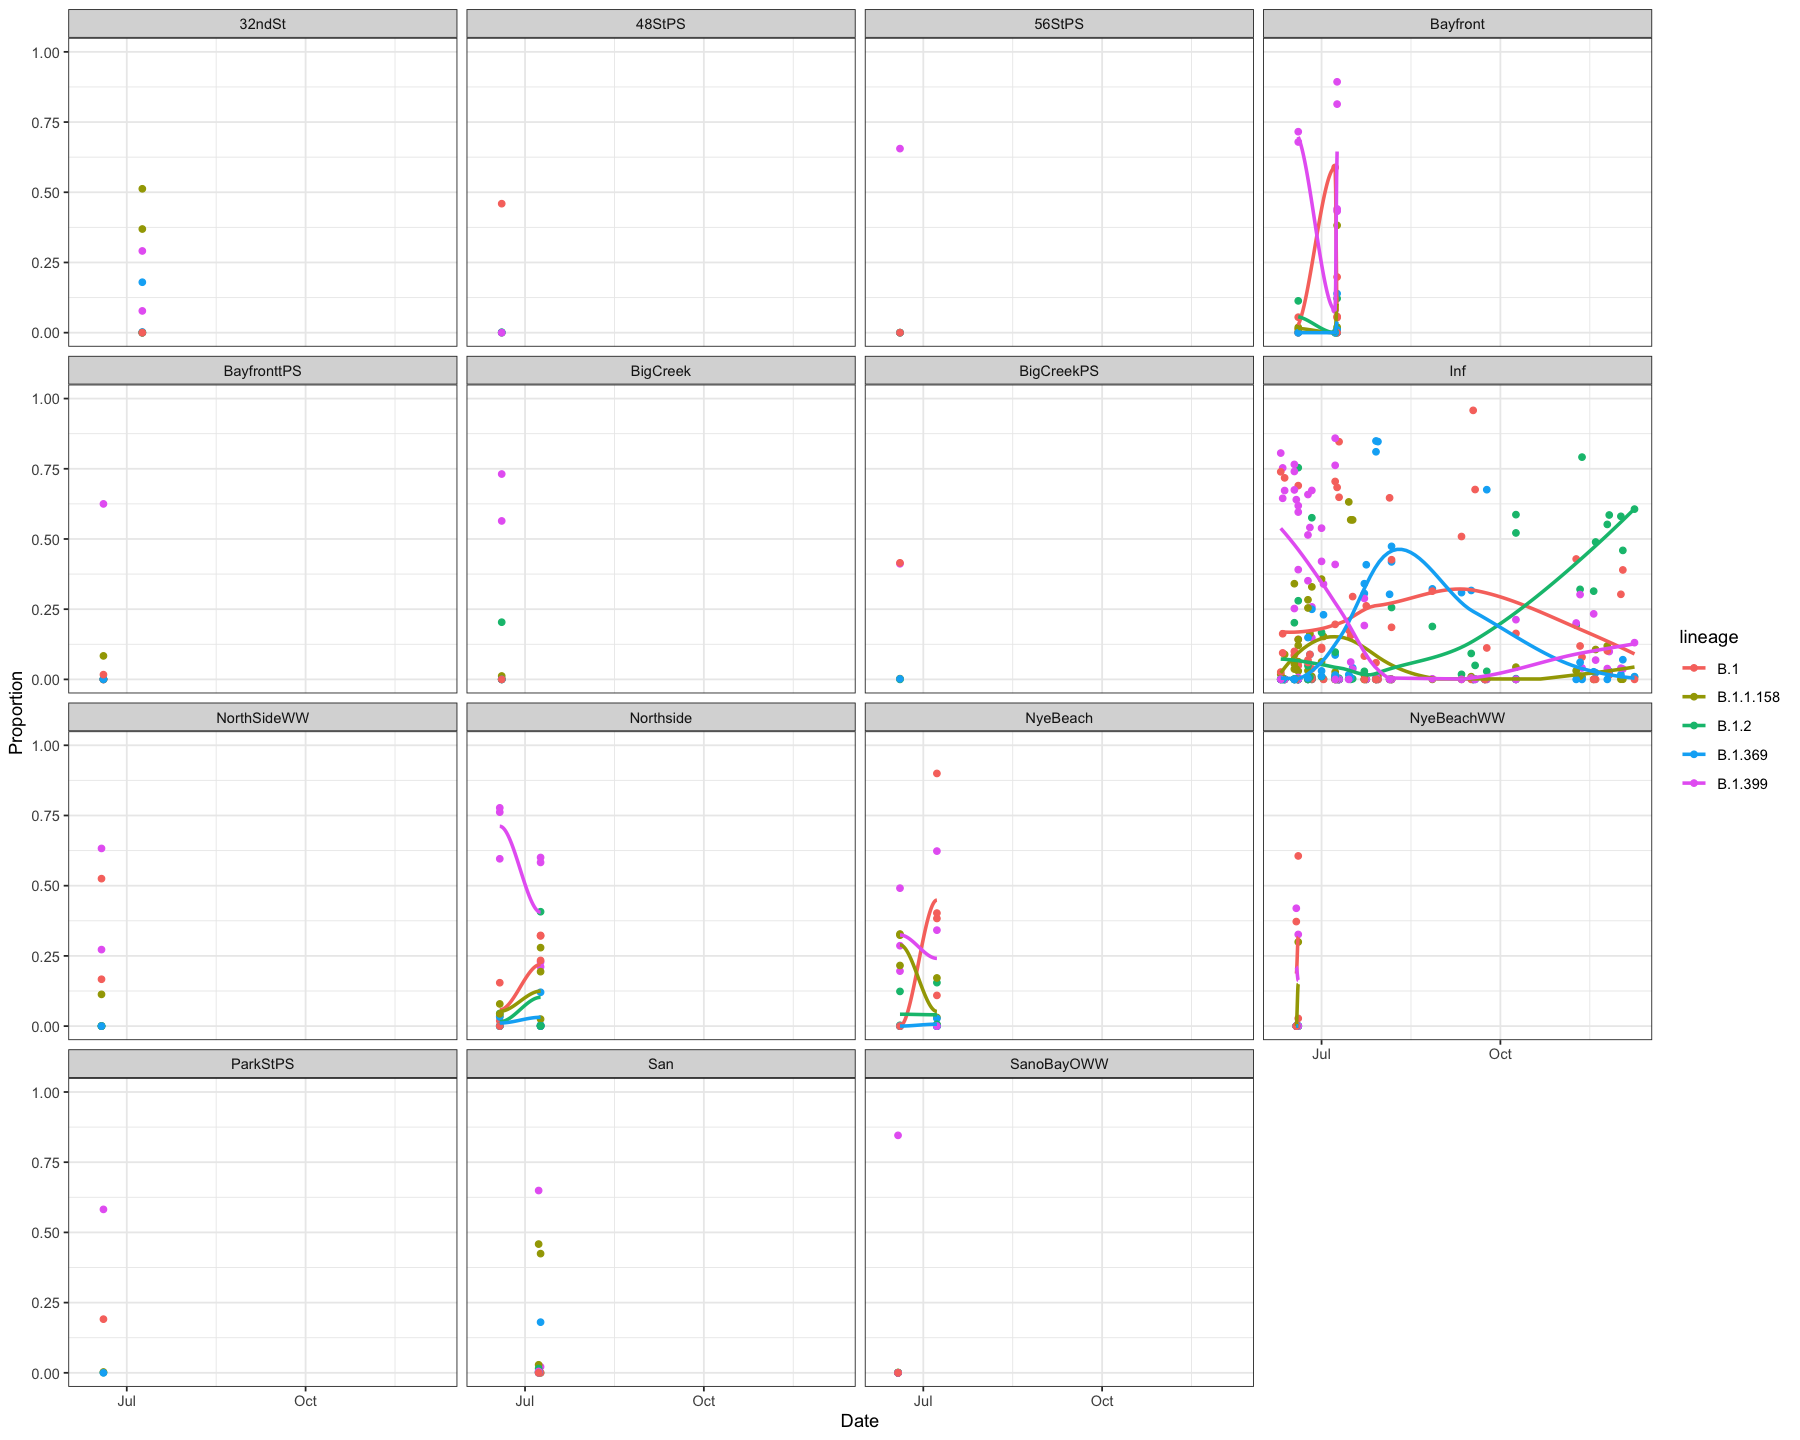

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

# One date failed to parse and looks like it's from 1900s (but no estimate)
res <- res[res$date > ymd("2020-01-01"), ]

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
